In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df= pd.read_csv('driver-data.csv')

In [3]:
df.shape

(4000, 3)

In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
features= df.drop('id',axis=1)

In [6]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [7]:
kmeans=KMeans(n_clusters=4)

In [8]:
cluster=kmeans.fit(features)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [10]:
cluster.labels_.shape

(4000,)

In [11]:
df['cluster']= cluster.labels_

In [12]:
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


In [13]:
df[df.cluster==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
5,3423313857,41.91,10,2
7,3423311434,52.02,8,2
22,3423312268,55.15,18,2
27,3423312113,45.75,16,2
41,3423313389,61.69,12,2
...,...,...,...,...
3195,3423312761,47.56,5,2
3196,3423314346,39.39,8,2
3197,3423313451,46.85,7,2
3198,3423313552,37.68,7,2


In [14]:
cluster.cluster_centers_

array([[ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494],
       [ 49.98428468,   5.21441441],
       [177.83509615,  70.28846154]])

C:\Users\excel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


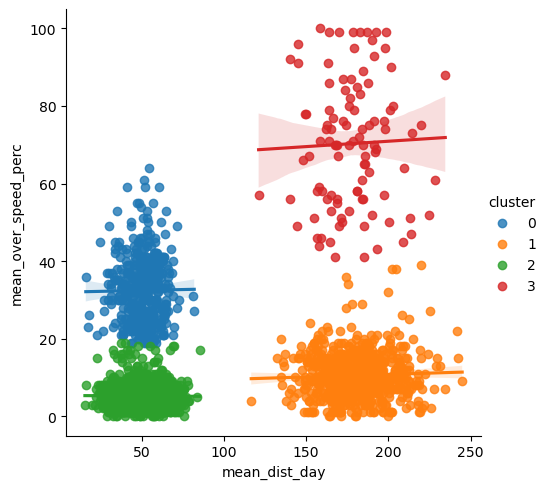

In [15]:
sns.lmplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

In [16]:
cluster.inertia_

719601.5383469039

### elbow method

In [17]:
inertia=[]
no_clusters=range(10)

In [18]:
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[12184626.129627973, 1316420.850947719, 992634.0606702475, 719601.1096991901, 534650.9989732961, 372841.7537827664, 319803.50871471496, 276961.4539553024, 252698.41739147497, 230186.37445104355]


Text(0.5, 1.0, 'Elbow Method')

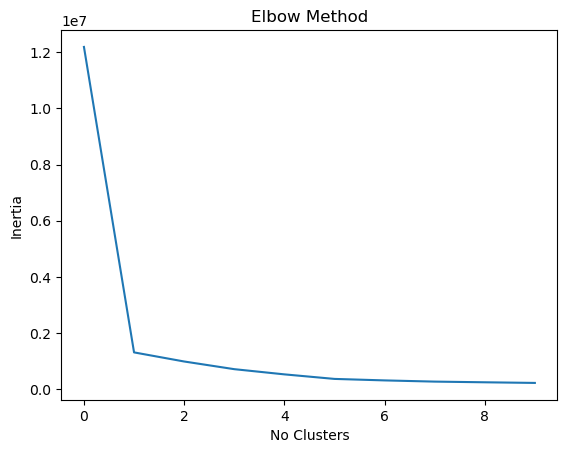

In [19]:
plt.plot(no_clusters,inertia)
plt.xlabel('No Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

## Hierarchial Clustering

In [20]:
df= pd.read_csv('zoo.csv')

In [21]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [22]:
features= df.drop(['animal_name','class_type'],axis=1)

In [23]:
features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [69]:
agg= AgglomerativeClustering(n_clusters=3,linkage='complete')

In [70]:
cluster=agg.fit(features)
cluster

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [71]:
cluster.labels_


array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1], dtype=int64)

In [72]:
silhouette_score(features,cluster.labels_)

0.3786741528153584

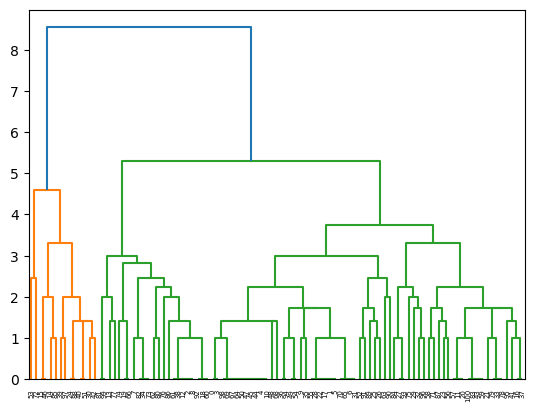

In [68]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))